# EDA Prior to Fitting a Classification Model

Learn about recommended EDA steps before fitting a classification model.

## Introduction

- Similar to regression models, it is important to conduct EDA before fitting a classification model. 
- An EDA should check the assumptions of the classification model, inspect how the data are coded, and check for strong relationships between features. 
- In this article, we will explore some of the EDA techniques that are generally employed prior to fitting a classification model.

## Data

- Suppose we want to build a model to predict whether a patient has heart disease or not based on other characteristics about them. 
- We have downloaded a dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease) about heart disease which contains patient information such as:
    - `age`: age in years
    - `sex`: male (1) or female (0)
    - `cp`: chest pain type
    - `trestbps`: resting blood pressure (mm Hg)
    - `chol`: cholesterol level
    - `fbs`: fasting blood sugar level (normal or not)
    - `restecg`: resting electrocardiograph results
    - `thalach`: maximum heart rate from an exercise test
    - `exang`: presence of exercise-induced angina
    - `oldpeak`: ST depression induced by exercise relative to rest
    - `slope`: slope of peak exercise ST segment
    - `ca`: number of vessels colored by flourosopy (0 through 3)
    - `thal`: type of defect (3, 6 or 7)
- The response variable for this analysis will be `heart_disease`, which we have condensed down to either 0 (if the patient does not have heart disease) or 1 (the patient does have heart disease).

<br>

- EDA is extremely useful to better understand which patient attributes are highly related to heart disease, and ultimately to build a classification model that can accurately predict whether someone has heart disease based on their measurements. 
- By exploring the data, we may be able to see which variables — or which combination of variables — provide the most information about whether or not the patient has heart disease.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- By looking at the first rows of data, we can note that all of the columns appear to contain numbers. 
- We can quickly check for missing values and data types by using `.info()`:

In [10]:
df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df.thalach = df.thalach.astype(int)
df.exang = df.exang.astype(int)
df.slope = df.slope.astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    object 
 12  thal           303 non-null    object 
 13  heart_disease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


- We can see that all columns have a count of “303 non-null” values, meaning there are no blank spaces in the dataset.
- However, there can still be other ways that missing data can be hiding in the data. 
- For example, `ca` and `thal` are `object` data types, indicating that there is at least one character in each of these columns which are preventing the variable from being read as a numeric data type. 
- This could be either an input mistake (such as the letter “o” in place of a “0”), or it can be an indication of how missing data were handled. 
- Depending on which model program is used, you may have to find and remove the observations with characters before proceeding with the model.

<br>

- We also want to make sure to check how categorical data is encoded before proceeding with model fitting. 
- For example, `cp` is the patient’s chest pain type and is indicated by a number between 1 and 4. 
- These numbers are intended to be treated as groups, so this variable should be changed into an object before continuing into the analysis.

## Pair plot

In [14]:
df[["age", "trestbps", "chol", "thalach", "oldpeak"]]

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,67,160,286,108,1.5
2,67,120,229,129,2.6
3,37,130,250,187,3.5
4,41,130,204,172,1.4
...,...,...,...,...,...
298,45,110,264,132,1.2
299,68,144,193,141,3.4
300,57,130,131,115,1.2
301,57,130,236,174,0.0


- The Target Variable `heart_disease` has values from 0 to 4. 
- It can be classified as follows:
    - `0`: No signs of heart disease
    - `1`: Minor signs of heart disease
    - `2`: Moderate signs of heart disease
    - `3`: Severe signs of heart disease
    - `4`: Very severe signs of heart disease
- We will convert this into a binary classification problem.
- `0` will be considered as `0` and all other values will be considered as `1`.

In [ ]:
df["heart_disease"] = df["heart_disease"].apply(lambda x: 1 if x > 0 else 0)    

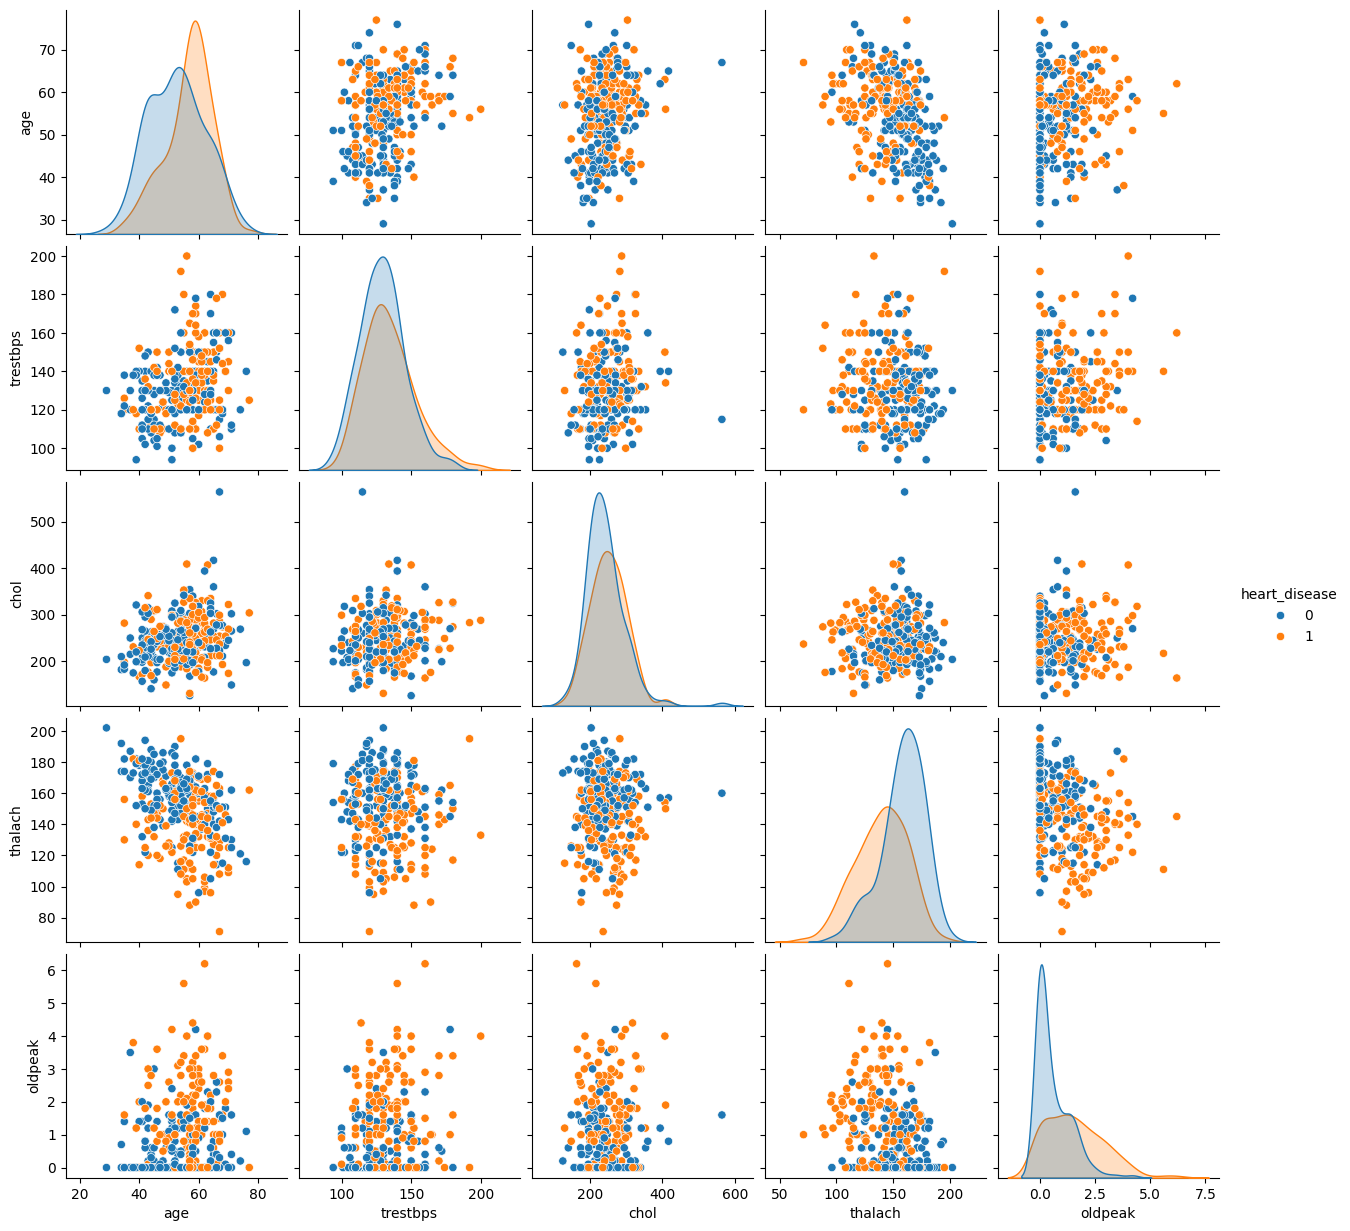

In [23]:
sns.pairplot(df[["age", "trestbps", "chol", "thalach", "oldpeak", "heart_disease"]], hue='heart_disease')
plt.show()

- In this pair plot, we are looking for patterns between the two color groups. 
- Looking at the density plots along the diagonal, there are no features that cleanly separate the groups (age has the most separation). However, looking at the scatterplot for `age` and `thalach` (maximum heart rate from an exercise test), there is more clear separation. 
- It appears that patients who are old and have low `thalach` are more likely to be diagnosed with heart disease than patients who are young and have high `thalach`. 
- This suggests that we want to make sure both of these features are included in our model.

## Correlation heat map

- Similar to linear regression, some classification models assume no multicollinearity in the data, meaning that two highly correlated predictors should not be included in the model. 
- We can check this assumption by looking at a correlation heat map:

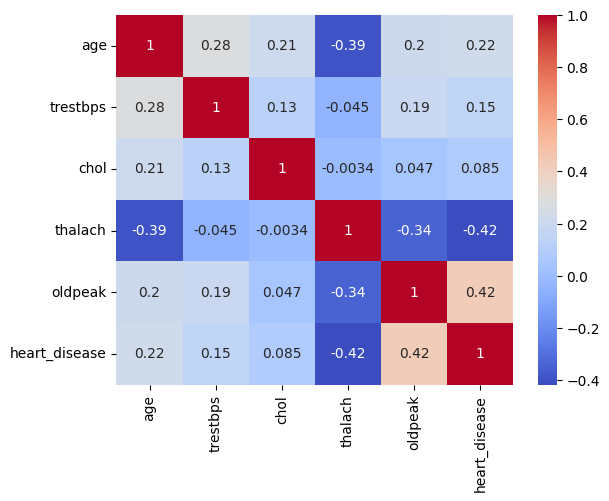

In [26]:
# plot the correlation matrix heatmap
sns.heatmap(df[["age", "trestbps", "chol", "thalach", "oldpeak", "heart_disease"]].corr(), annot=True, cmap='coolwarm')
plt.show()

- There is no set value for what counts as “highly correlated”, however a general rule is a correlation of 0.7 (or -0.7).
- There are no pairs of features with a correlation of 0.7 or higher, so we do not need to consider leaving any features out of our model based on multicollinearity.

## Further exploration

- You can use more complex visualizations to examine the relationships between 2 or more features and the response variable at the same time.
- For example, the following boxplots show the relationship between `oldpeak`, `slope`, and `heart_disease`:

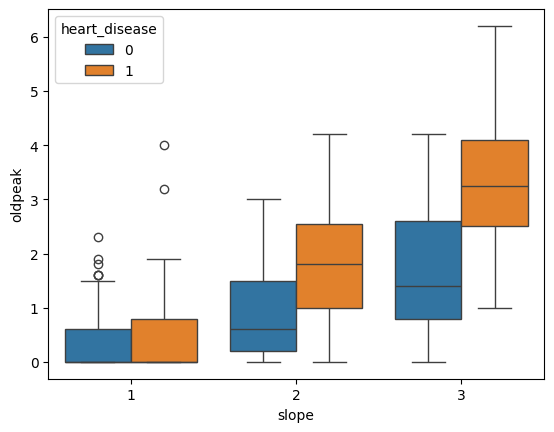

In [28]:
sns.boxplot(x="slope", y="oldpeak", data=df, hue="heart_disease")
plt.show()

- In this boxplot, we can see a pretty distinct difference between those with heart disease and those without at slope level 3. 
- Seeing this distinction indicates that on average `oldpeak` is connected to heart disease at different `slope` levels. 
- This gives insight that it might be beneficial to include an interaction term between `oldpeak` and `slope` in a linear regression model.

## Classification model results

- After this EDA, we can run a principal component analysis (PCA), which attempts to identify which features (or combination of features) are highly related to heart disease. 
- Ideal results of a PCA show one or more pairs of principal components with some separation between the colored groups:
    <img src="Images/pca_pairplot.svg" width="800">
- We can see here that there are not any clear separations, which would indicate that this is not an effective analysis. 
- However, we might use the weights of the components to further explore relationships between features and use that in other analyses.

## Conclusion

- Exploring the data in the ways outlined above will help prepare you to build an effective classification model. 
- These steps ensure that the data is properly coded and can be useful for both feature selection and model tuning.